# ribo-gcamp

In [1]:
import matplotlib.pyplot as plt
import numpy as np

## create synthetic ribo-gcamp ramp trace generator

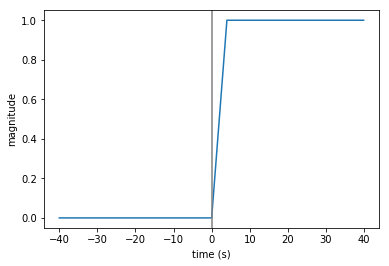

In [149]:
time_vec=np.arange(-40,40,0.1)

def gen_ribo_trace(rise_time,in_time_vec):
    out_vec=np.zeros(len(time_vec))
    for i in range(len(time_vec)):
        if in_time_vec[i]>0:
            if in_time_vec[i]<rise_time:
                out_vec[i]=in_time_vec[i]/rise_time
            else:
                out_vec[i]=1.0
                                   
    return out_vec 

fig, ax = plt.subplots()
plt.plot(time_vec,gen_ribo_trace(4.0,time_vec))
plt.xlabel("time (s)")
plt.ylabel("magnitude")
ax.axvline(x=0, color='gray')
plt.show()

## create first-order impulse response function


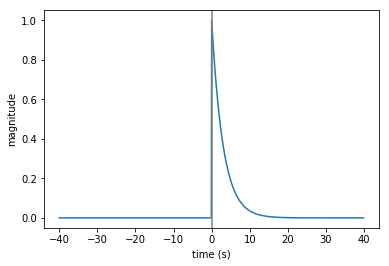

In [151]:
def gen_irf(tau,in_time_vec):
    out_vec=np.zeros(len(time_vec))
    for i in range(len(time_vec)):
        if in_time_vec[i]>0:
                out_vec[i]=np.exp(-in_time_vec[i]/tau)
    return out_vec

fig, ax = plt.subplots()
plt.plot(time_vec,gen_irf(3.0,time_vec))
plt.xlabel("time (s)")
plt.ylabel("magnitude")
ax.axvline(x=0, color='gray')
plt.show()

## create nls trace generator as convolution of ribo-gcamp traces and irf

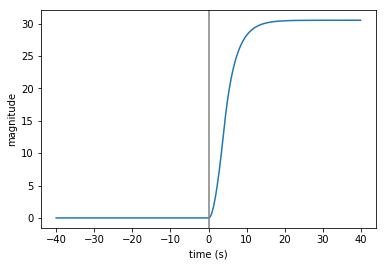

In [152]:
def gen_nls_trace(rise_time,tau,in_time_vec):   
    convolved_vec=np.convolve(gen_ribo_trace(rise_time,in_time_vec),gen_irf(tau,in_time_vec),mode='same') 
    out_vec=convolved_vec
    return out_vec


fig, ax = plt.subplots()
plt.plot(time_vec,gen_nls_trace(4.0,3.0,time_vec))
plt.xlabel("time (s)")
plt.ylabel("magnitude")
ax.axvline(x=0, color='gray')
plt.show()

## measure rise time of trace

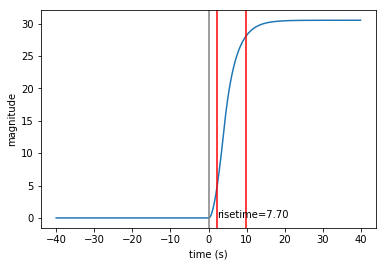

In [169]:
def measure_rise_time(trace,in_time_vec,threshold_low=0.1,threshold_high=0.9):
    
    # find start time
    start_time=in_time_vec[np.argmax(trace > (max(trace)-min(trace))*threshold_low+min(trace))]
    
    # find end time
    end_time=in_time_vec[np.argmax(trace > (max(trace)-min(trace))*threshold_high+min(trace))]

    rise_time = end_time - start_time
    return rise_time, start_time, end_time
 
    
test_trace=gen_nls_trace(8.0,2.0,time_vec)       
test_rise_time, test_start_time, test_end_time = measure_rise_time(test_trace,time_vec)
    
fig, ax = plt.subplots()
plt.plot(time_vec,gen_nls_trace(4.0,3.0,time_vec))
plt.text(test_start_time, 0, 'risetime={:.2f}'.format(test_rise_time))
plt.xlabel("time (s)")
plt.ylabel("magnitude")
ax.axvline(x=0, color='gray')
ax.axvline(x=test_start_time, color='red')
ax.axvline(x=test_end_time, color='red')
plt.show()

## transform ribo-gcamp rise times into nls-gcamp rise times given an i.r.f. tau

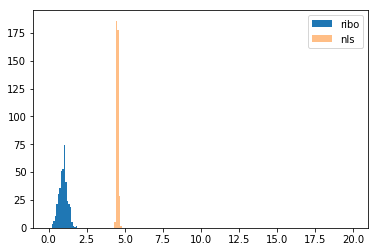

In [160]:
def transform_rise_times(ribo_vec,tau):
    
    this_time_vec=np.arange(-40,40,0.1)
    nls_vec=[]
    
    for time in ribo_vec:
        rt, _, _ = measure_rise_time(gen_nls_trace(time,tau,this_time_vec),this_time_vec)
        nls_vec = np.append(nls_vec,rt)
    
    return nls_vec

test_ribo=abs((np.random.randn(400)*0.3)+1)
test_nls=transform_rise_times(test_ribo,tau=2)

_, bins, _ = plt.hist(test_ribo,range=[0, 20],bins=200,label='ribo')
_ = plt.hist(test_nls, bins=bins, alpha=0.5,label='nls')

plt.legend(loc='upper right')
plt.show()



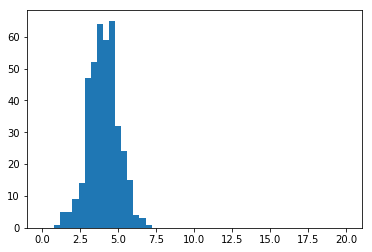

In [142]:
len(test_ribo)
_, bins, _ = plt.hist(test_ribo,range=[0, 20],bins=50,label='ribo')
test_nls=transform_rise_times(test_ribo,5)

## define histogram-based error function

In [ ]:
def error_func(vec1,vec2):

    num_bins=30;
    
    # make hist
    hist_exp()
    
    # transform rise_times
    vec2_model = transform_rise_times(vec1)
    hist_model=hist(vec2_model)
    
    # compare hists
    return distance(hist_model,hist_vec2)
    
   

## find tau that best explains data

## plot tau error landscape

## make a good plot

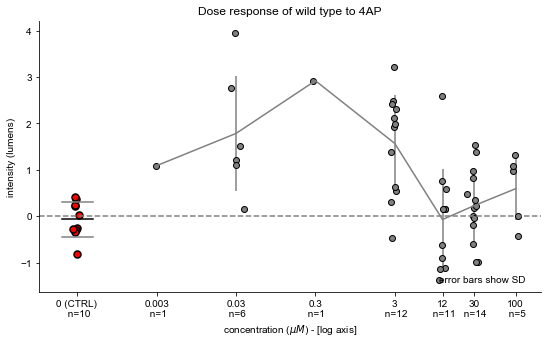

In [5]:
# this gets rid of upper and right axis box lines and sets ticks outward
def simpleaxis(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

f=plt.figure(1,figsize=(9, 5), facecolor='white')  
plt.rc('font',**{'family':'sans-serif','sans-serif':['Arial']}) #just a pet peeve of mine. Don't like DejaVu.ttf
ax1=plt.subplot(111)

#add x-jitter to points to see them better, although you may not want to if the x values (conc) have scalar meaning
jitter_amount=0.03
xtick_interval=np.log10(data_conc[1]) - np.log10(data_conc[0]) #use for x spacing of column data

# plot scatter for each group
for i in range(num_groups):
    plt.plot(jitter_amount*xtick_interval*np.random.randn(data[i].size) + np.log10((data_conc[i])*np.ones(data[i].size)),
             data[i],linestyle='none',marker='o',
             markersize=6, markerfacecolor='gray',
             markeredgewidth=1,markeredgecolor='black')
    
# build x-axis labels with significant digits and a second line of n's #
xaxis_labels=[]
for i in range(num_groups):
    xaxis_labels.append( str(data_conc[i]) + "\n n=" + str(len(data[i])))
    #use this one for formatting values
    #xaxis_labels.append( "{:3.1f}".format(data_concentration[i]) + "\n n=" + str(len(data[i])))

# compute group means and stdevs 
data_means=[]
data_stdevs=[]
for i in range(num_groups):
    data_means.append(np.mean(data[i]))
    data_stdevs.append(np.std(data[i]))
    
# plot a line plot of group means with error bars
simpleaxis(ax1) 
ax1.errorbar(np.log10(data_conc),data_means,
            yerr=data_stdevs,
            fmt='-',color='gray')

# plot control group if you have one, to the left
try:  
    barwidth=0.2;
    xtick_interval=np.log10(data_conc[1]) - np.log10(data_conc[0])
    control_xvalue = np.log10(data_conc[0]) - xtick_interval #borrow x-spacing from adjacent data
    # scatter
    plt.plot(jitter_amount*xtick_interval*np.random.randn(len(data_control)) + control_xvalue*np.ones(len(data_control)),
             data_control,linestyle='none',marker='o',
             markersize=7, markerfacecolor='red',
             markeredgewidth=1.5,markeredgecolor='black')
    # mean bar
    plt.plot([control_xvalue - barwidth*xtick_interval, control_xvalue + barwidth*xtick_interval],
             [np.mean(data_control), np.mean(data_control)],color="black")
    # error bars
    plt.plot([control_xvalue - barwidth*xtick_interval, control_xvalue + barwidth*xtick_interval],
             [np.mean(data_control)-np.std(data_control), 
              np.mean(data_control)-np.std(data_control)],color="gray")
    plt.plot([control_xvalue - barwidth*xtick_interval, control_xvalue + barwidth*xtick_interval],
             [np.mean(data_control)+np.std(data_control), 
              np.mean(data_control)+np.std(data_control)],color="gray")   
    xaxis_labels.insert(0, "0 (CTRL) \n n=" + str(len(data_control)))
except:
    data_control=[];
    control_xvalue=[];
    
#always say what the error bars mean!
ax1.text(0.97, 0.03, "error bars show SD", transform=ax1.transAxes, fontsize=10,
        verticalalignment='bottom',horizontalalignment='right')

#if an absolute x or y value is meaningful, draw a dashed line
plt.axhline(0,linestyle='--',color='gray')

# ALWAYS LABEL YOUR AXES, with units, and if log scale
# choose tick label intervals that balance clutter with explicitness
# space the x coordinates of the group sensibly; use log plot if necessary
# show a reasonable number of significant digits for your tick values

data_conc_units = '$\mu M$'  # the dollar signs allow TeX-like rendering for greek symbols, etc.
plt.xlabel("concentration (" + data_conc_units + ") " + "- [log axis]")
plt.ylabel("intensity (lumens)")
plt.xticks(np.insert(np.log10(data_conc),0,control_xvalue))
ax1.set_xticklabels(xaxis_labels)
plt.title("Dose response of wild type to 4AP")

# save a file out for easy dumping to presentations
f.savefig("DoseResponse-7groups.pdf", bbox_inches='tight')